In [1]:
run gerrymandering_tools.py

In [3]:
precincts = gp.read_file('gdf_mp_sp.shp')

In [4]:
s = pickle.load(open('1590781243assignments.pkl', 'rb'))
d = pickle.load(open('1590781243data.pkl', 'rb'))

In [5]:
graph = Graph.from_json('graph_zero_2018.json')

(206340.0469999997, 696211.4729999999, 4066802.5100000007, 4681513.089999999)

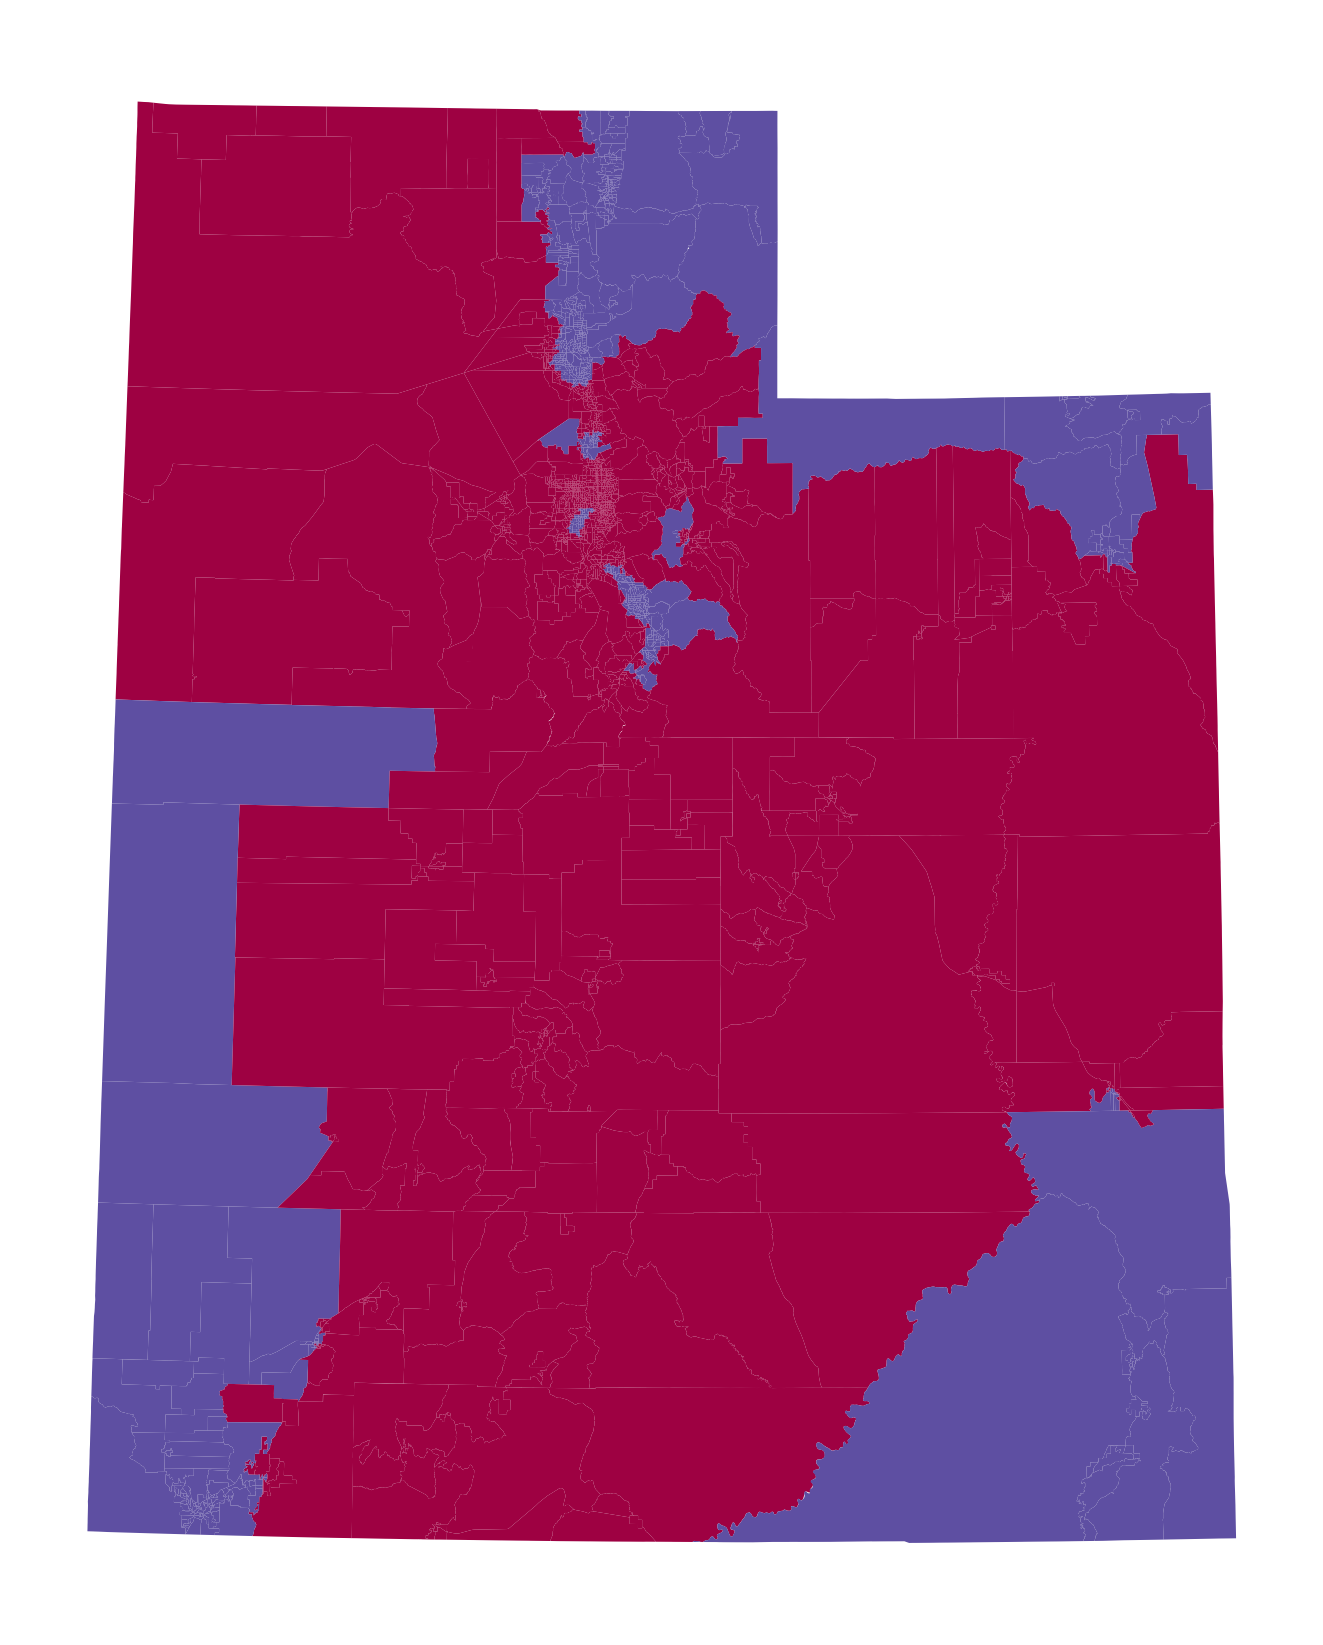

In [22]:
never_moving_precincts = []
for i in tqdm(graph.nodes):
    assignments = np.array([ a[i] for a in s ])
    if not any(assignments - assignments[0]):
        never_moving_precincts.append(i)
        
slice1 = np.array([1 if i in never_moving_precincts else 0 for i in graph.nodes])

# Mark the zero-population nodes
f = precincts
f['nmp'] = slice1

# Plot the zero-population nodes
size, dpi =(14,7), 300
fig, ax = plt.subplots(figsize=size, dpi=dpi)
f.plot(column='nmp', ax=ax, cmap='Spectral')
plt.axis("off")